# 🍷 Wine Quality Dataset

#  Description :
Ce jeu de données concerne les variantes rouges du vin portugais "Vinho Verde".  
Il décrit la quantité de différentes substances chimiques présentes dans le vin et leur effet sur sa qualité. 

**La tâche consiste à prédire la qualité du vin à partir des données fournies.**

## Objectif du projet
### Construire un modèle prédicatif pour prédire la qualité du vin.

### Ce DataFrame contient les colonnes suivantes :
Variables d'entrée (issues de tests physico-chimiques) :  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  

Variable de sortie (issue de données sensorielles) :    
12 - quality (score between 0 and 10)


Remerciements :
Ce jeu de données est également disponible sur Kaggle et dans le dépôt UCI de machine learning :
https://archive.ics.uci.edu/ml/datasets/wine+quality

Objectif :
- Comprendre le jeu de données et le nettoyer (si nécessaire)
- Construire des modèles de classification pour prédire la qualité du vin
- Ajuster les hyperparamètres et comparer les métriques d’évaluation de différents algorithmes de classification

## Importation des bibliothéques

In [2]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Importation et nettoyage des données

In [3]:
# Chargement des données
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# fonction pour calculer les statistiques de base d'une dataframe.
def fonction_stats(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calcule un tableau de statistiques pour chaque colonne, qu'elle soit numérique ou qualitative :
      - info, non_null, unique, zeros, nans, missing
      - pour les numériques : min, max, mean, median, skew, std, variance
      - pour les qualitatives : top (modalité la plus fréquente) et freq (sa fréquence)
    """
    # Initialisation des métriques communes
    stats = pd.DataFrame({
        'info'      : df.dtypes,
        'non_null'  : df.count(),
        'unique'    : df.nunique(),
        'zeros'     : (df == 0).sum(numeric_only=True),
        'nans'      : df.isna().sum(),
        'missing'   : df.isnull().sum()
    })

    # Sélection des colonnes par type
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Statistiques quantitatives
    if len(num_cols):
        stats.loc[num_cols, 'min']       = df[num_cols].min()
        stats.loc[num_cols, 'max']       = df[num_cols].max()
        stats.loc[num_cols, 'mean']      = df[num_cols].mean()
        stats.loc[num_cols, 'median']    = df[num_cols].median()
        stats.loc[num_cols, 'skew']      = df[num_cols].skew()
        stats.loc[num_cols, 'ecart type']= df[num_cols].std()
        stats.loc[num_cols, 'variance']  = df[num_cols].var()

    # Statistiques qualitatives
    if len(cat_cols):
        # top et freq issues de describe(include='all')
        desc_cat = df[cat_cols].describe(include='all').T[['top', 'freq']]
        stats = stats.join(desc_cat, how='left')

    # Mode pour toutes les colonnes (première valeur si plusieurs)
    modes = df.mode().iloc[0]
    stats['mode'] = modes

    return stats

# Exemple d'utilisation
stats = fonction_stats(df)
stats

,info,non_null,unique,zeros,nans,missing,min,max,mean,median,skew,ecart type,variance,mode
fixed acidity,float64,1143,91,0,0,0,4.60000,15.90000,8.311111,7.90000,1.044930,1.747595,3.054088,7.2000
volatile acidity,float64,1143,135,0,0,0,0.12000,1.58000,0.531339,0.52000,0.681547,0.179633,0.032268,0.5000
citric acid,float64,1143,77,99,0,0,0.00000,1.00000,0.268364,0.25000,0.371561,0.196686,0.038685,0.0000
residual sugar,float64,1143,80,0,0,0,0.90000,15.50000,2.532152,2.20000,4.361096,1.355917,1.838512,2.0000
chlorides,float64,1143,131,0,0,0,0.01200,0.61100,0.086933,0.07900,6.026360,0.047267,0.002234,0.0800
free sulfur dioxide,float64,1143,53,0,0,0,1.00000,68.00000,15.615486,13.00000,1.231261,10.250486,105.072466,6.0000
total sulfur dioxide,float64,1143,138,0,0,0,6.00000,289.00000,45.914698,37.00000,1.665766,32.782130,1074.668067,28.0000
density,float64,1143,388,0,0,0,0.99007,1.00369,0.996730,0.99668,0.102395,0.001925,0.000004,0.9976
pH,float64,1143,87,0,0,0,2.74000,4.01000,3.311015,3.31000,0.221138,0.156664,0.024544,3.3000
sulphates,float64,1143,89,0,0,0,0.33000,2.00000,0.657708,0.62000,2.497266,0.170399,0.029036,0.6000


## Affichage des doublons

In [5]:
# Affichage des doublons
df.duplicated().sum()

np.int64(0)

# Conclusions

###  1. Créer une nouvelle variable plus explicite bound SO2 (sulfur dioxide liée)
- Pourquoi ?  
total sulfur dioxide = free SO2 + bound SO2.  
Seule la forme libre agit immédiatement comme conservateur antimicrobien, tandis que la forme liée donne une idée de l'activité chimique dans le vin (fixation sur composés aromatiques, acides, etc.)
- Avantage du calcul :
On sépare les  deux comportements chimiques différents et on peut découvrir que bound SO2 a un lien plus fort avec la qualité ou certains types de vin.

### 2. citric acid: remplacer 0 par une valeur très petite
- Pourquoi ?  
Les 0 risquent de poser problème si on applique une transformation logarithmique (log, log1p, etc.) pour réduire la skewness.(Asymétrie)
- Pourquoi 1e-12 ?
C’est une valeur proche de 0 mais non nulle, qui permet de préserver l’effet de rareté, sans déclencher d’erreur numérique.
Lorsqu'on standardise les données, on peut avoir un problème avec les valeurs nulles. si on standardiseles données le 1e-12 sera rapidement absorbé dans la moyenne.
## Actions :
### 3. Supprimer la colonne Id  et total sulfur dioxide
- Pourquoi ?   
Id - En tant q'un identifiant unique, elle ne contribue pas à l'apprentissage du modèle.  
Total sulfur dioxide = free sulfur dioxide + bound SO2. On peut la supprimer pour éviter les redondances dans les données.

### 4. Verifief de nouveau les doublons dues à l'ajout de bound SO2 et a la suppresion des colonnes


In [6]:
# Création de la nouvelle variable bound SO2
if {'total sulfur dioxide', 'free sulfur dioxide'}.issubset(df.columns):
    df['bound SO2'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

# traitement des 0 dans la colonne citric acid
if 'citric acid' in df.columns:
    df['citric acid'] = df['citric acid'].replace(0, 1e-12)

# Supprimer la colonne Id et total sulfur dioxide
colonnes_a_supprimer = ["Id", "total sulfur dioxide"]
colonnes_presentes = [col for col in colonnes_a_supprimer if col in df.columns]

# Verifiction si la suppression deja faite
if colonnes_presentes:
    df.drop(columns=colonnes_presentes, inplace=True)
    print(f" Colonnes supprimées : {colonnes_presentes}")
else:
    print(f'Colonnes : {colonnes_a_supprimer} dèja supprimes')
    print(f'-'*100)


# Controler la presence des doublons apres la suppression des colonnes inutiles (ID et Total sulphur dioxide)
print(f'Nombre de doublons apres suppression des colonnes : {df.duplicated().sum()}')

fonction_stats(df)

 Colonnes supprimées : ['Id', 'total sulfur dioxide']
Nombre de doublons apres suppression des colonnes : 125


,info,non_null,unique,zeros,nans,missing,min,max,mean,median,skew,ecart type,variance,mode
fixed acidity,float64,1143,91,0,0,0,4.600000e+00,15.90000,8.311111,7.90000,1.044930,1.747595,3.054088,7.200000e+00
volatile acidity,float64,1143,135,0,0,0,1.200000e-01,1.58000,0.531339,0.52000,0.681547,0.179633,0.032268,5.000000e-01
citric acid,float64,1143,77,0,0,0,1.000000e-12,1.00000,0.268364,0.25000,0.371561,0.196686,0.038685,1.000000e-12
residual sugar,float64,1143,80,0,0,0,9.000000e-01,15.50000,2.532152,2.20000,4.361096,1.355917,1.838512,2.000000e+00
chlorides,float64,1143,131,0,0,0,1.200000e-02,0.61100,0.086933,0.07900,6.026360,0.047267,0.002234,8.000000e-02
free sulfur dioxide,float64,1143,53,0,0,0,1.000000e+00,68.00000,15.615486,13.00000,1.231261,10.250486,105.072466,6.000000e+00
density,float64,1143,388,0,0,0,9.900700e-01,1.00369,0.996730,0.99668,0.102395,0.001925,0.000004,9.976000e-01
pH,float64,1143,87,0,0,0,2.740000e+00,4.01000,3.311015,3.31000,0.221138,0.156664,0.024544,3.300000e+00
sulphates,float64,1143,89,0,0,0,3.300000e-01,2.00000,0.657708,0.62000,2.497266,0.170399,0.029036,6.000000e-01
alcohol,float64,1143,61,0,0,0,8.400000e+00,14.90000,10.442111,10.20000,0.863313,1.082196,1.171147,9.500000e+00


### Conclusions & Actions:
* Doublons détectés après suppression des colonnes inutiles.
* Suppression des doublons en gardant la première occurrence unique.
* Pourqui supprimer les doublons?
  Supprimer les doublons permet d'éviter les biais dans l'apprentissage et améliorer la performance du modèle.
* Pourqui garder la premiere occurrence unique ?  
  Garder la premiere occurrence unique de chaque ligne permet de conserver les informations initiales de chaque ligne.


In [7]:
# Supprimer les doublons garder la premiere occurence unique de chaque ligne
df.drop_duplicates(keep='first', inplace=True)
print(f'Nombre de doublons apres suppression : {df.duplicated().sum()}')


# affichage des statistiques du dataframe apres suppression des doublons
fonction_stats(df)

Nombre de doublons apres suppression : 0


,info,non_null,unique,zeros,nans,missing,min,max,mean,median,skew,ecart type,variance,mode
fixed acidity,float64,1018,91,0,0,0,4.600000e+00,15.90000,8.288507,7.900000,1.037193,1.741324,3.032208,7.000000e+00
volatile acidity,float64,1018,135,0,0,0,1.200000e-01,1.58000,0.533541,0.520000,0.719668,0.183167,0.033550,4.300000e-01
citric acid,float64,1018,77,0,0,0,1.000000e-12,1.00000,0.268802,0.250000,0.368824,0.196229,0.038506,1.000000e-12
residual sugar,float64,1018,80,0,0,0,9.000000e-01,15.50000,2.524411,2.200000,4.350318,1.314850,1.728831,2.000000e+00
chlorides,float64,1018,131,0,0,0,1.200000e-02,0.61100,0.087187,0.079000,5.933225,0.048506,0.002353,8.000000e-02
free sulfur dioxide,float64,1018,53,0,0,0,1.000000e+00,68.00000,15.648821,13.000000,1.172090,10.176525,103.561655,6.000000e+00
density,float64,1018,388,0,0,0,9.900700e-01,1.00369,0.996700,0.996665,0.091874,0.001916,0.000004,9.976000e-01
pH,float64,1018,87,0,0,0,2.740000e+00,4.01000,3.311503,3.310000,0.257993,0.157775,0.024893,3.300000e+00
sulphates,float64,1018,89,0,0,0,3.300000e-01,2.00000,0.656817,0.620000,2.424667,0.167542,0.028070,6.000000e-01
alcohol,float64,1018,61,0,0,0,8.400000e+00,14.90000,10.452456,10.200000,0.848859,1.095064,1.199166,9.500000e+00


quality
8     15
7    122
6    409
5    433
4     33
3      6
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


<Axes: xlabel='quality'>

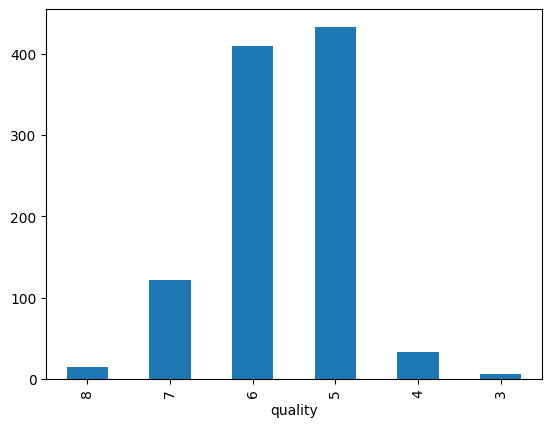

In [8]:
# Affichage de la distribution du label quality
print(df['quality'].value_counts().sort_index(ascending=False))
print(f'-'*100)

df['quality'].value_counts().sort_index(ascending=False).plot(kind='bar')


## Asymetrie ou skewnees
Pourquoi ?  
L'asymétrie ou skewness est une mesure de la déviation de la distribution des données.  
Exemple simple sur une colonne : residual sugar a des echantillons qui depassent 10g/l alors que la moyenne est de 3g/l.
donc il "tire" vers le haut la moyenne et il a déforme a la fois.
Pour qui c'est importatnt ?
- Pour la normalisation des données.


assymetrie ou skewness des variables : 


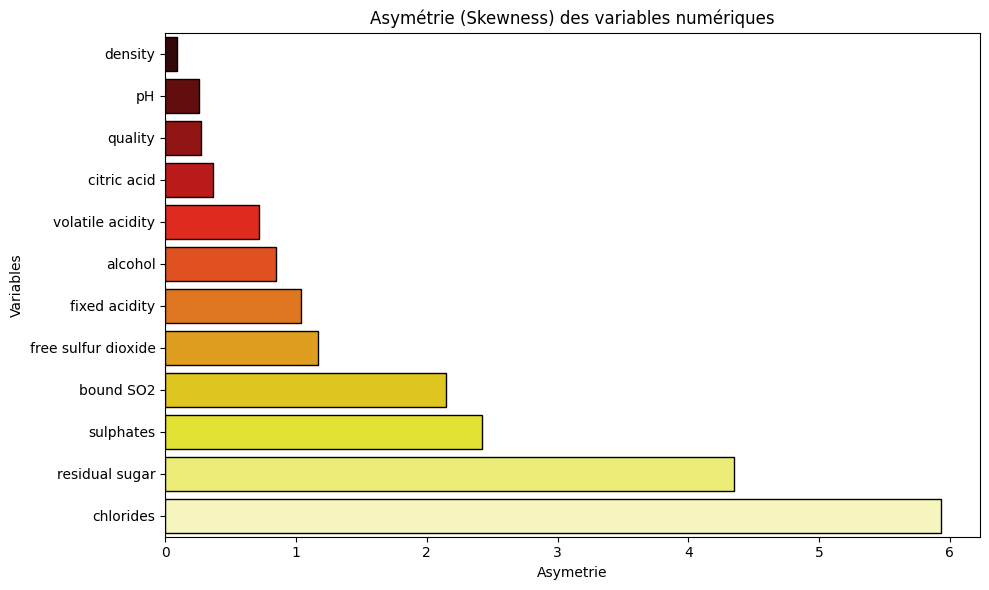

In [9]:
print(f'assymetrie ou skewness des variables : ')
# Vérification de l’asymétrie des données
skew_data = df.skew(numeric_only=True).sort_values()

# Visualisation de l'asymetrie avec Seaborn
skew_df = pd.DataFrame({'Variables': skew_data.index, 'Asymetrie': skew_data.values})

plt.figure(figsize=(10, 6))
sns.barplot(data=skew_df, x='Asymetrie', y='Variables', hue='Variables', palette='hot', edgecolor='black')
plt.title("Asymétrie (Skewness) des variables numériques")
plt.axvline(0, color='gray', linestyle='--') # pour repérer la symétrie
plt.tight_layout()
plt.show()

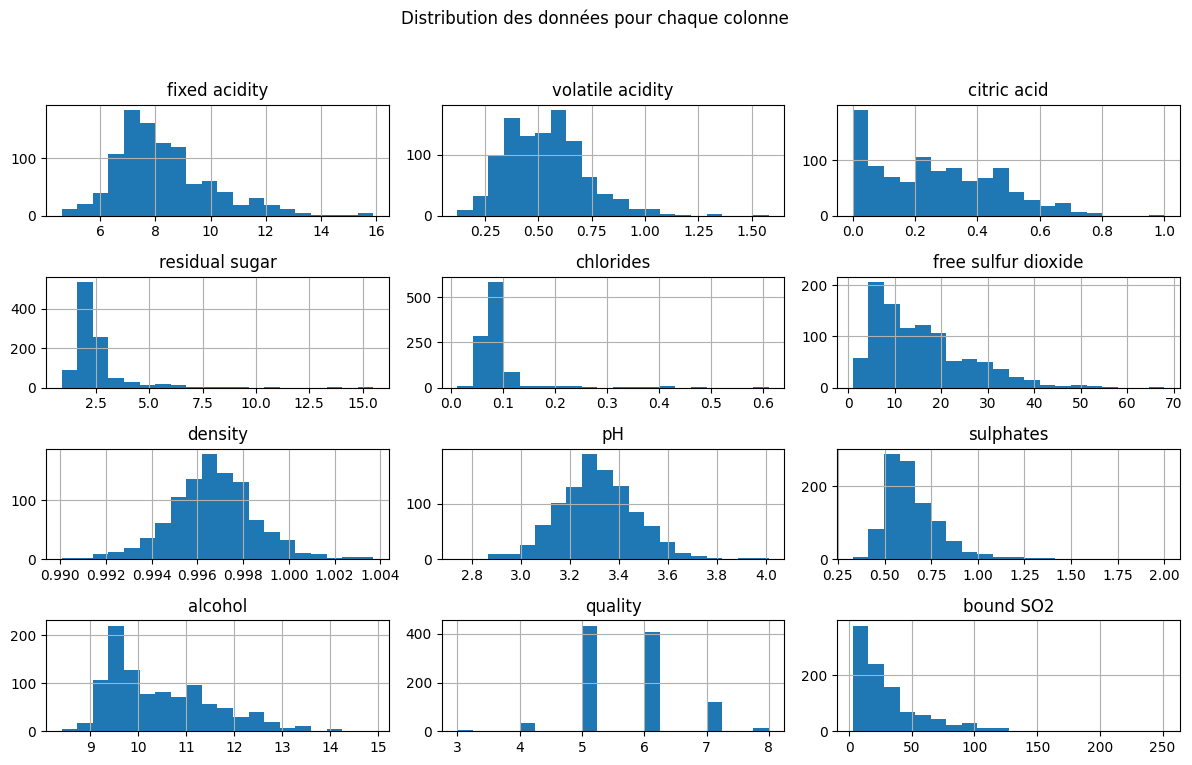

In [10]:
# La distribution des données pour chaque colonne. 
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution des données pour chaque colonne')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Matrice de correlation

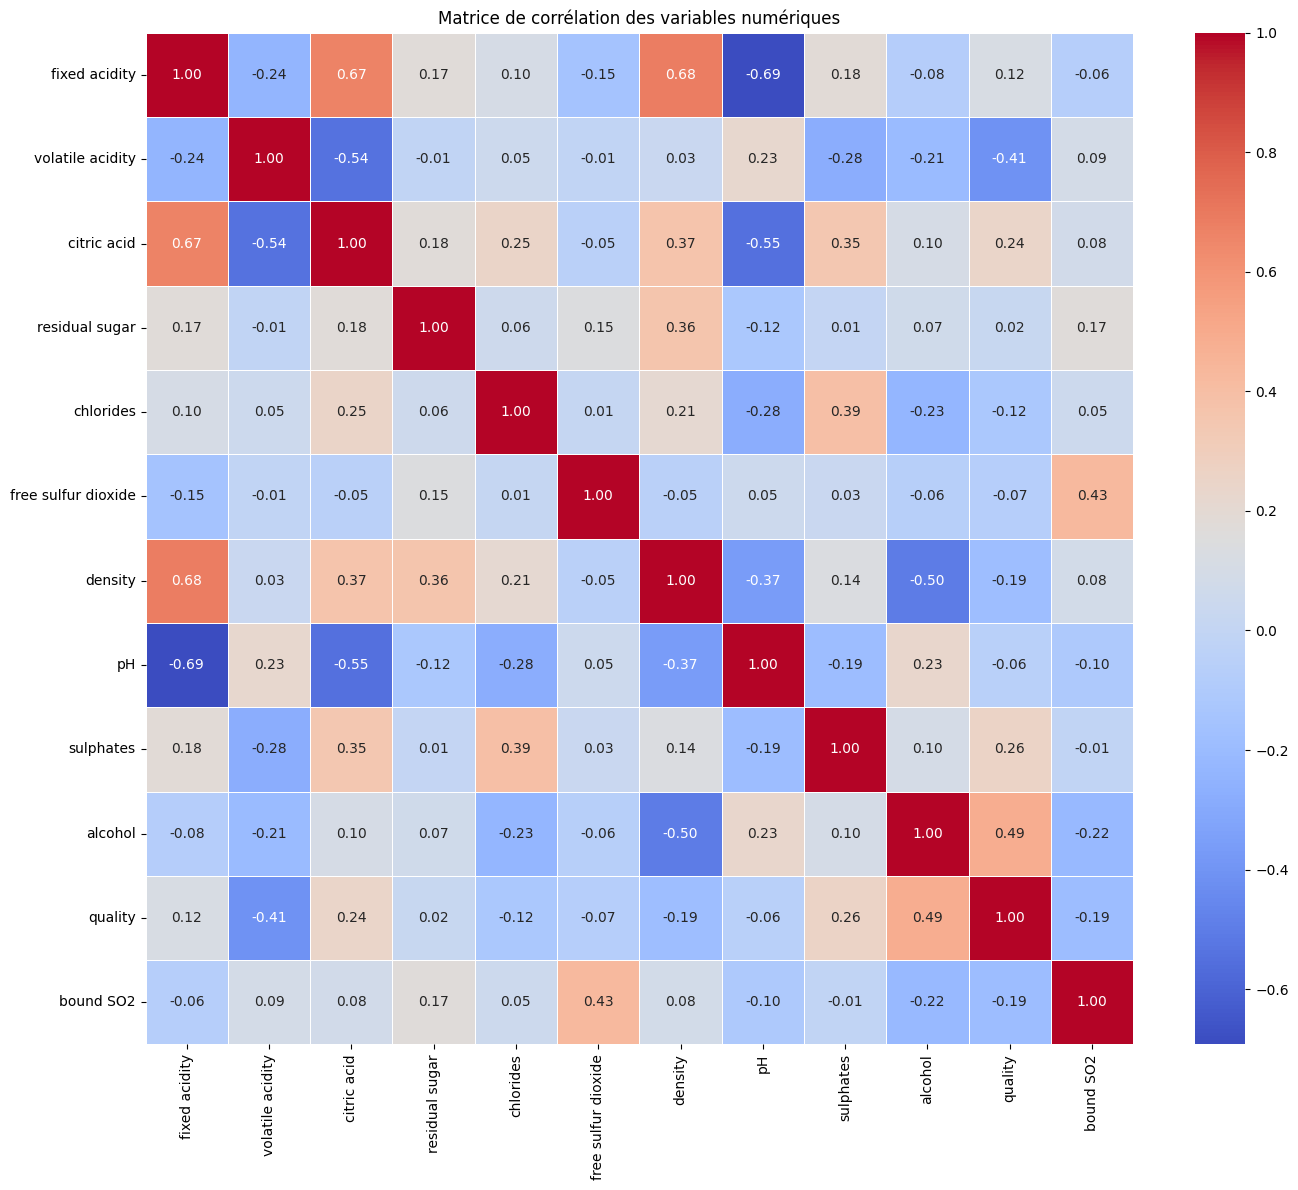

In [11]:
# generation de la heatmap de correlation

plt.figure(figsize=(14, 12))  # Taille du graphique :  14 pouces de large × 12 de haut

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()

## Conslusions & Actions :
* Les labels notées de 3 à 8 sont ordonnées mais déséquilibrées (par exemple, il y a beaucoup plus de vins de qualité moyenne que de vins excellents ou médiocres).
* labels sont t'ils pertinats pour l'analyse ou si elles devraient être regroupées. Par exemple en 3 categories des scores : faible, moyen, elevé.
* Il existe une forte corrélation entre certaines variables, comme l'alcool et le pH.
* Comparer 2 ou 3 methodes de classificaton avec les metrics accuray + loss 

### Normalisationion des données
* StandardScaler : Centrer et réduire les données pour qu'elles aient une moyenne de 0 et un écart-type de 1.  
Label quality non noramlise c' est un label catégoriel

In [12]:
from sklearn.preprocessing import StandardScaler

# Séparer les features et la cible
X = df.drop(columns='quality')
y = df['quality']

# Normalisation des variables explicatives
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Recomposer le DataFrame complet avec la variable cible (quality) non normalisée

df_scaled = X_scaled.copy()
df_scaled['quality'] = y.values
# Afficher les stats des données normalisées
fonction_stats(df_scaled)

,info,non_null,unique,zeros,nans,missing,min,max,mean,median,skew,ecart type,variance,mode
fixed acidity,float64,1018,91,0,0,0,-2.119261,4.373245,-7.258983e-16,-0.223220,1.037193,1.000492,1.000983,-0.740322
volatile acidity,float64,1018,135,0,0,0,-2.258834,5.715939,2.024139e-16,-0.073965,0.719668,1.000492,1.000983,-0.565560
citric acid,float64,1018,77,0,0,0,-1.370507,3.728076,-4.187875e-17,-0.095861,0.368824,1.000492,1.000983,-1.370507
residual sugar,float64,1018,80,0,0,0,-1.236041,9.873344,-3.978481e-16,-0.246849,4.350318,1.000492,1.000983,-0.399033
chlorides,float64,1018,131,0,0,0,-1.550822,10.804332,-1.395958e-16,-0.168860,5.933225,1.000492,1.000983,-0.148234
free sulfur dioxide,float64,1018,53,0,0,0,-1.440179,5.146837,-8.375749e-17,-0.260415,1.172090,1.000492,1.000983,-0.948611
density,float64,1018,388,0,0,0,-3.461076,3.649503,-3.685330e-15,-0.018031,0.091874,1.000492,1.000983,0.470103
pH,float64,1018,87,0,0,0,-3.624041,4.429342,-1.703069e-15,-0.009531,0.257993,1.000492,1.000983,-0.072943
sulphates,float64,1018,89,0,0,0,-1.951619,8.020936,1.095827e-15,-0.219858,2.424667,1.000492,1.000983,-0.339290
alcohol,float64,1018,61,0,0,0,-1.875200,4.063442,-5.583833e-17,-0.230653,0.848859,1.000492,1.000983,-0.870199


#### Les graphiquess boites a moustaches montrent pour chaque variable chimique, la distribution de ses valeurs selon la qualité du vin.
**Mise en evidence de :**  
- la position de la médiane (tendance centrale)
- l’étendue des données et la présence d’outliers
- la variation inter-quartile (IQR)  


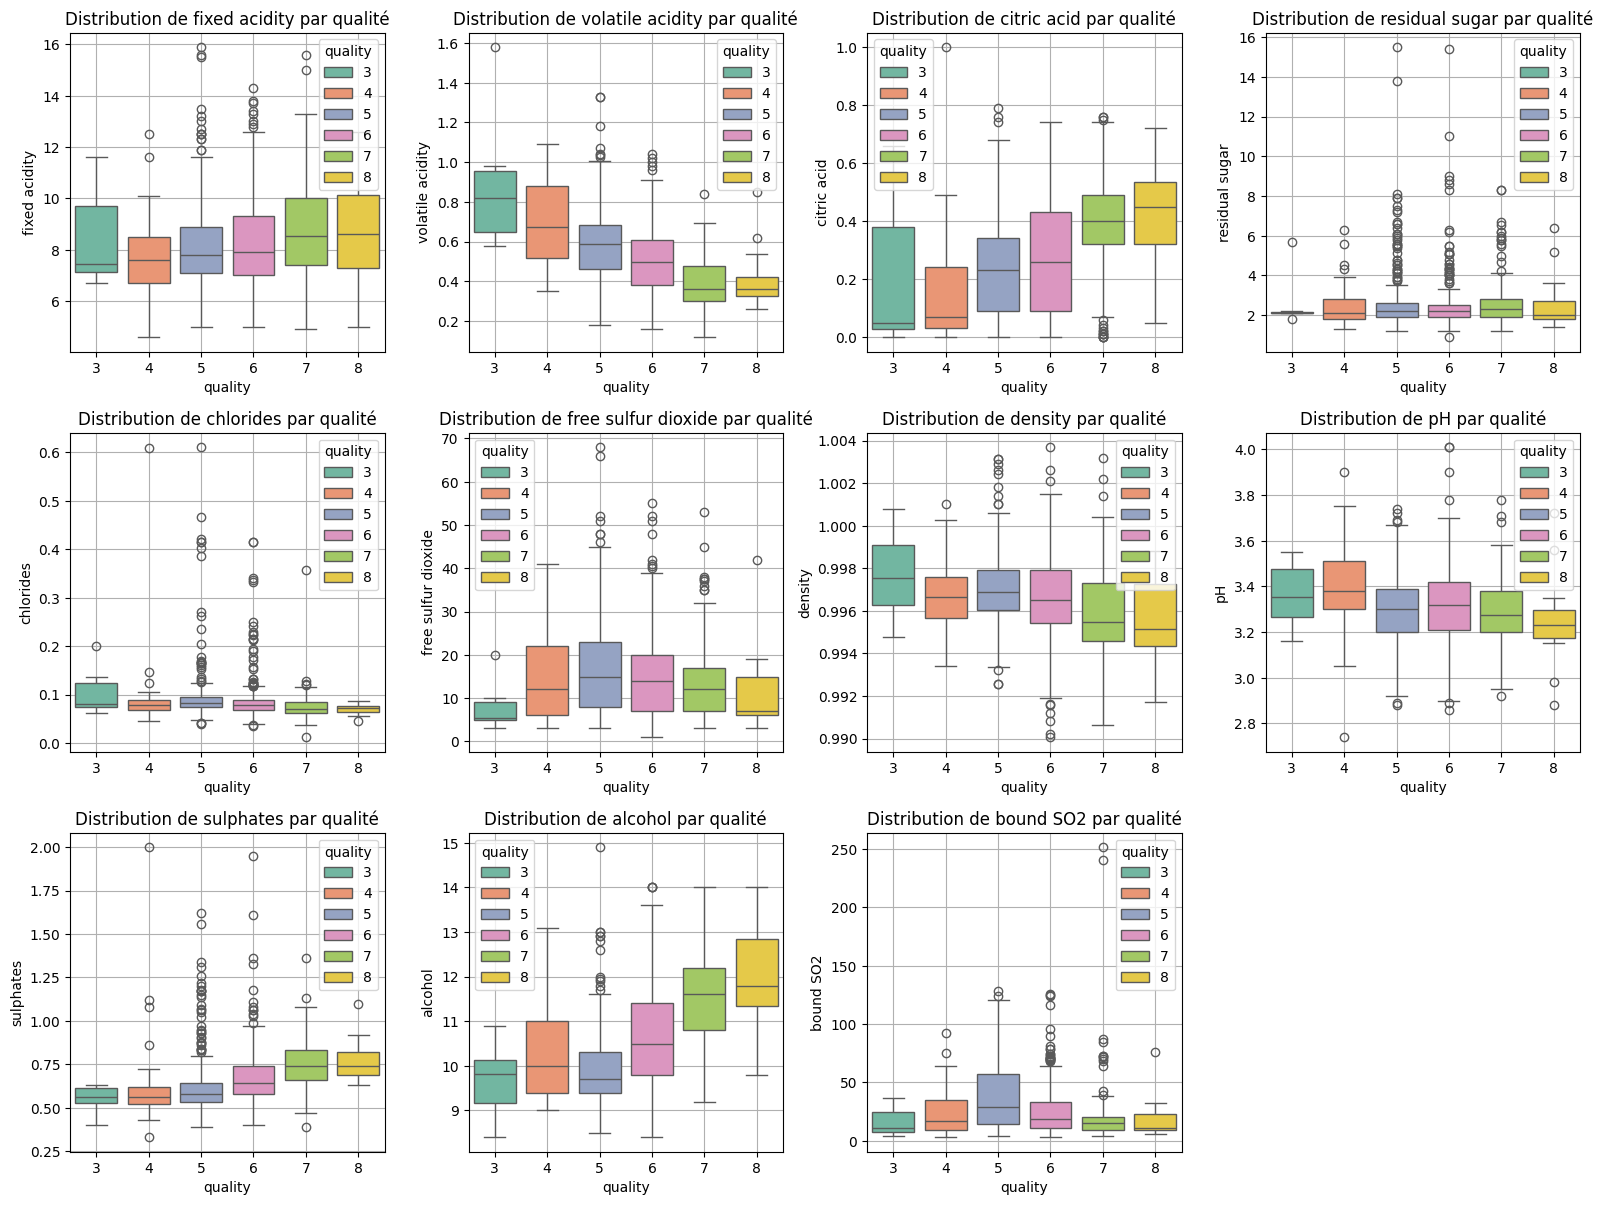

In [13]:
# Liste des colonnes numériques (hors cible)
numeriques = df.select_dtypes(include='number').drop(columns=['quality'])

# Dimensions du tableau
n_cols = 4
n_rows = (len(numeriques) + n_cols - 1) // n_cols

# Création du tableau de sous-graphes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Boucle sur chaque variable
for i, col in enumerate(numeriques.columns):
    sns.boxplot(data=df, x='quality', hue='quality' , y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution de {col} par qualité')
    axes[i].grid(True)

# Supprimer les cases vides si nécessaire
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Analyse :
- Acidité volatile : 
La médiane décroît nettement quand la qualité augmente, indiquant une corrélation négative marquée.
- Sulfates : 
Les vins de meilleure qualité présentent des taux de sulfates plus élevés en moyenne, donc corrélation positive.
- Alcool : 
On observe une montée de la médiane d’alcool avec la qualité, ce qui confirme l’impact positif de l’alcool sur la perception de la qualité.
- Chlorures : 
Les chlorures diminuent lorsque la qualité monte, traduisant une relation négative.
- Densité : 
La densité baisse avec la qualité, en accord avec l’augmentation d’alcool et la diminution de sucres.
- Acidité fixe : 
On note une légère hausse de la médiane, mais la dispersion reste importante, signifiant une corrélation faible à modérée.
- Acide citrique : 
Léger accroissement de la médiane pour les bonnes qualités, corrélation positive discrète.
- pH : 
Le pH montre une faible tendance à augmenter avec la qualité, sans grande dispersion.
- Résidu sucre : 
La médiane reste quasiment constante, suggérant une corrélation négligeable.
- Free SO₂ et Bound SO₂ : 
Aucune évolution claire de la médiane, donc peu de corrélation avec la qualité.

#### Premiere execution et analyse des resultats Regression logistique

In [14]:
#importation des bibliotheques

from sklearn.model_selection import train_test_split
from sklearn.linear_model     import LogisticRegression
from sklearn.metrics          import accuracy_score, log_loss, classification_report
from sklearn.model_selection import train_test_split,cross_val_score


# 0) Copier le DF original en deux versions
df_lr     = df_scaled.copy()  # Version 1 : sans regroupement
df_lr_gr  = df_scaled.copy()  # Version 2 : avec regroupement

# 1) Regroupement des labels pour la version 2
def to_group(q):
    if q <= 5: return 'faible'
    if q <= 6: return 'moyen'
    return 'élevé'

df_lr_gr['quality_group'] = df_lr_gr['quality'].apply(to_group)

# 2) Choix des features
features = df_lr.columns.drop('quality')

# 3) Split stratifié une seule fois sur la cible d'origine (6 classes)
idx_train, idx_test = train_test_split(
    df_lr.index,
    test_size=0.2,
    stratify=df_lr['quality'],
    random_state=42
)

# 4) Préparer les X/y pour chaque version
# Version 1 : labels originaux
X_train_v1 = df_lr.loc[idx_train, features]
y_train_v1 = df_lr.loc[idx_train, 'quality']
X_test_v1  = df_lr.loc[idx_test,  features]
y_test_v1  = df_lr.loc[idx_test,  'quality']

# Version 2 : labels regroupés
X_train_v2 = df_lr_gr.loc[idx_train, features]
y_train_v2 = df_lr_gr.loc[idx_train, 'quality_group']
X_test_v2  = df_lr_gr.loc[idx_test,  features]
y_test_v2  = df_lr_gr.loc[idx_test,  'quality_group']

# 5) Initialiser le même classifieur pour les deux versions
clf = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

# Petite fonction pour afficher metrics par classe
def per_class_metrics(name, y_true, y_pred, y_proba):
    labels = np.unique(y_true)
    print(f"\n––– {name} : per-class accuracy & log-loss –––")
    for lab in labels:
        mask = (y_true == lab)
        acc = accuracy_score(y_true[mask], y_pred[mask])
        loss = log_loss(y_true[mask], y_proba[mask], labels=labels)
        print(f"{lab:6}  Acc={acc:.3f}  Loss={loss:.3f}")

# 6) Entraîner et évaluer V1
clf.fit(X_train_v1, y_train_v1)
y_pred_t1  = clf.predict(X_train_v1)
y_proba_t1 = clf.predict_proba(X_train_v1)
y_pred_1   = clf.predict(X_test_v1)
y_proba_1  = clf.predict_proba(X_test_v1)

print("=== Version 1 : sans regroupement ===")
print(f"Train Acc  : {accuracy_score(y_train_v1, y_pred_t1):.3f}")
print(f"Train Loss : {log_loss(y_train_v1, y_proba_t1):.3f}")
print(f"Test  Acc  : {accuracy_score(y_test_v1,  y_pred_1):.3f}")
print(f"Test  Loss : {log_loss(y_test_v1,  y_proba_1):.3f}")
print("\nClassification Report (V1, test):")
print(classification_report(y_test_v1, y_pred_1, zero_division=0))
per_class_metrics("V1 train", y_train_v1, y_pred_t1, y_proba_t1)
per_class_metrics("V1 test",  y_test_v1,  y_pred_1, y_proba_1)

# 7) Entraîner et évaluer V2
clf.fit(X_train_v2, y_train_v2)
y_pred_t2  = clf.predict(X_train_v2)
y_proba_t2 = clf.predict_proba(X_train_v2)
y_pred_2   = clf.predict(X_test_v2)
y_proba_2  = clf.predict_proba(X_test_v2)

print("\n=== Version 2 : labels regroupés ===")
print(f"Train Acc  : {accuracy_score(y_train_v2, y_pred_t2):.3f}")
print(f"Train Loss : {log_loss(y_train_v2, y_proba_t2):.3f}")
print(f"Test  Acc  : {accuracy_score(y_test_v2,  y_pred_2):.3f}")
print(f"Test  Loss : {log_loss(y_test_v2,  y_proba_2):.3f}")
print("\nClassification Report (V2, test):")
print(classification_report(y_test_v2, y_pred_2, zero_division=0))
per_class_metrics("V2 train", y_train_v2, y_pred_t2, y_proba_t2)
per_class_metrics("V2 test",  y_test_v2,  y_pred_2, y_proba_2)


=== Version 1 : sans regroupement ===
Train Acc  : 0.547
Train Loss : 1.118
Test  Acc  : 0.485
Test  Loss : 1.192

Classification Report (V1, test):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.14      0.09         7
           5       0.65      0.64      0.65        87
           6       0.54      0.35      0.43        82
           7       0.42      0.46      0.44        24
           8       0.12      0.67      0.20         3

    accuracy                           0.49       204
   macro avg       0.30      0.38      0.30       204
weighted avg       0.55      0.49      0.51       204


––– V1 train : per-class accuracy & log-loss –––
     3  Acc=1.000  Loss=0.867
     4  Acc=0.269  Loss=1.441
     5  Acc=0.697  Loss=0.957
     6  Acc=0.407  Loss=1.251
     7  Acc=0.531  Loss=1.180
     8  Acc=0.583  Loss=1.001

––– V1 test : per-class accuracy & log-loss –––
     3  Acc=0.000  Loss=3.447

#### Visualisation des courbes accuracy et loss

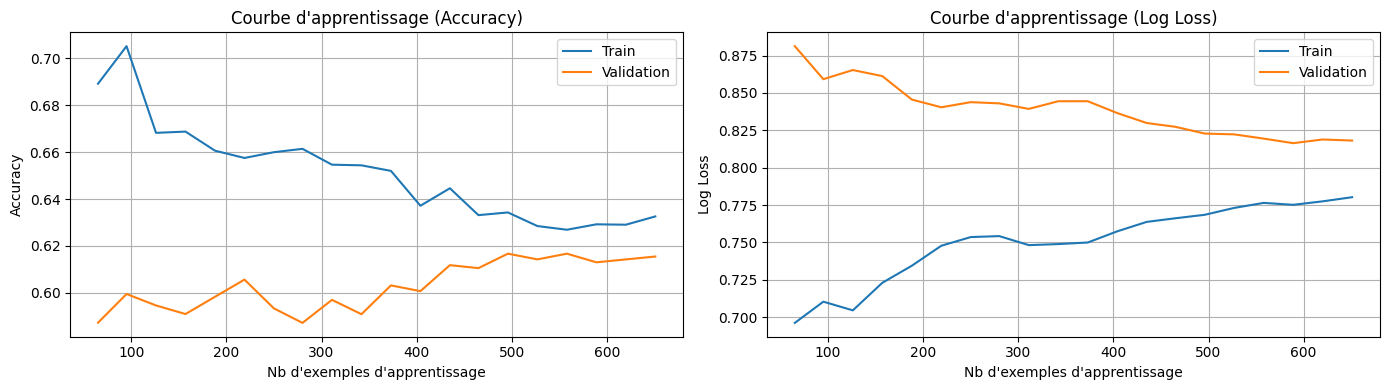

In [15]:
# importation des librairies nécessaires
from sklearn.model_selection import learning_curve

# Paramètres (reprendre le classifieur et X_train_v2/y_train_v2 ou autre)
clf = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)

train_sizes = np.linspace(0.1, 1.0, 20)

# Courbe accuracy
sizes, train_scores_acc, test_scores_acc = learning_curve(
    clf, X_train_v2, y_train_v2,
    train_sizes=train_sizes, cv=5,
    scoring='accuracy',
    n_jobs=-1, shuffle=True, random_state=42
)
train_acc_mean = np.mean(train_scores_acc, axis=1)
test_acc_mean = np.mean(test_scores_acc, axis=1)

# Courbe log loss
sizes2, train_scores_loss, test_scores_loss = learning_curve(
    clf, X_train_v2, y_train_v2,
    train_sizes=train_sizes, cv=5,
    scoring='neg_log_loss',
    n_jobs=-1, shuffle=True, random_state=42
)
train_loss_mean = -np.mean(train_scores_loss, axis=1)
test_loss_mean = -np.mean(test_scores_loss, axis=1)

# Affichage côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# --- Accuracy ---
axs[0].plot(sizes, train_acc_mean, label="Train", color='C0')
axs[0].plot(sizes, test_acc_mean, label="Validation", color='C1')
axs[0].set_xlabel("Nb d'exemples d'apprentissage")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Courbe d'apprentissage (Accuracy)")
axs[0].legend()
axs[0].grid()


# --- Log Loss ---
axs[1].plot(sizes2, train_loss_mean, label="Train", color='C0')
axs[1].plot(sizes2, test_loss_mean, label="Validation", color='C1')
axs[1].set_xlabel("Nb d'exemples d'apprentissage")
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Courbe d'apprentissage (Log Loss)")
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()


#### Premiere execution avec le random forest 
* labels 3,4,5,6,7,8 
* puis avec regroupemment des labels en trois classes des scores: faible moyen eleve

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,log_loss

# --- Version 1 : tous les labels originaux ---
df_labels = df_scaled.copy()
X1 = df_labels.drop(['quality'], axis=1)
y1 = df_labels['quality']

# Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Modèle Random Forest
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)
y1_proba= rf1.predict_proba(X1_test)
log_loss1 = log_loss(y1_test, y1_proba) # Calcul du log loss


# Metrics
print("=== Random Forest - Tous les labels ===")
print("Accuracy :", accuracy_score(y1_test, y1_pred))
print("Classification Report :\n", classification_report(y1_test, y1_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y1_test, y1_pred))
print("Log Loss (cross-entropy) :", log_loss1)


# --- Version 2 : labels regroupés faible/moyen/élevé ---
df_group = df.copy()
def regroupe_qualite(q):
    if q <= 5:
        return "faible"
    elif q <= 6:
        return "moyen"
    else:
        return "eleve"
df_group['quality_group'] = df_group['quality'].apply(regroupe_qualite)
X2 = df_group.drop(['quality', 'quality_group'], axis=1)  # <- CORRECTIF ICI
y2 = df_group['quality_group']

# Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# Modèle Random Forest
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train, y2_train)
y2_pred = rf2.predict(X2_test)
y2_proba= rf2.predict_proba(X2_test)
log_loss2=log_loss(y2_test,y2_proba,labels=rf2.classes_)


# Metrics
print("\n=== Random Forest - Labels regroupés (faible/moyen/élevé) ===")
print("Accuracy :", accuracy_score(y2_test, y2_pred))
print("Classification Report :\n", classification_report(y2_test, y2_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y2_test, y2_pred))
print("Log Loss (cross-entropy) labels regroupés :", log_loss2)

=== Random Forest - Tous les labels ===
Accuracy : 0.5637254901960784
Classification Report :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.61      0.63      0.62        87
           6       0.53      0.60      0.56        82
           7       0.58      0.46      0.51        24
           8       0.00      0.00      0.00         3

    accuracy                           0.56       204
   macro avg       0.29      0.28      0.28       204
weighted avg       0.54      0.56      0.55       204

Matrice de confusion :
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  1 55 29  2  0]
 [ 0  1 28 49  4  0]
 [ 0  0  2 10 11  1]
 [ 0  0  0  1  2  0]]
Log Loss (cross-entropy) : 0.9719428877492187

=== Random Forest - Labels regroupés (faible/moyen/élevé) ===
Accuracy : 0.6568627450980392
Classification Report :
               precision    recall  f1-score   s

#### Visualistaion des matrices de co confusion et des courbes ROC pour chaque modèle

##### Matrice de confusion


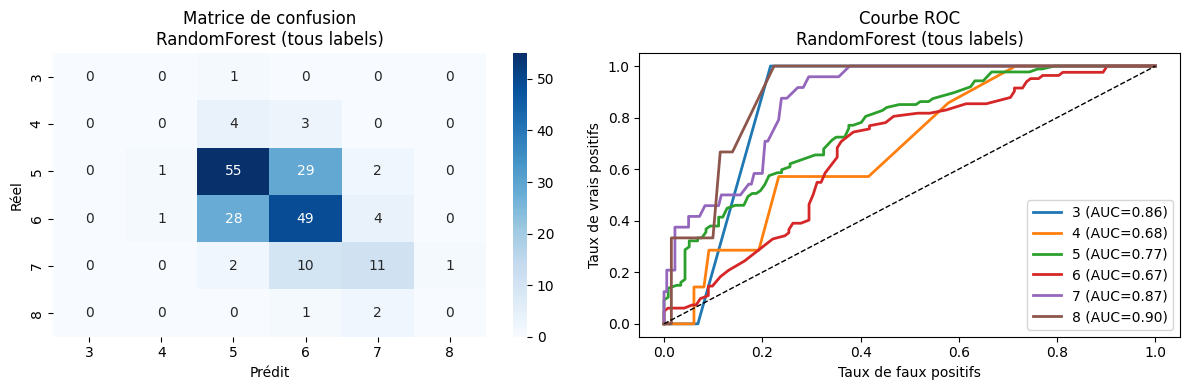

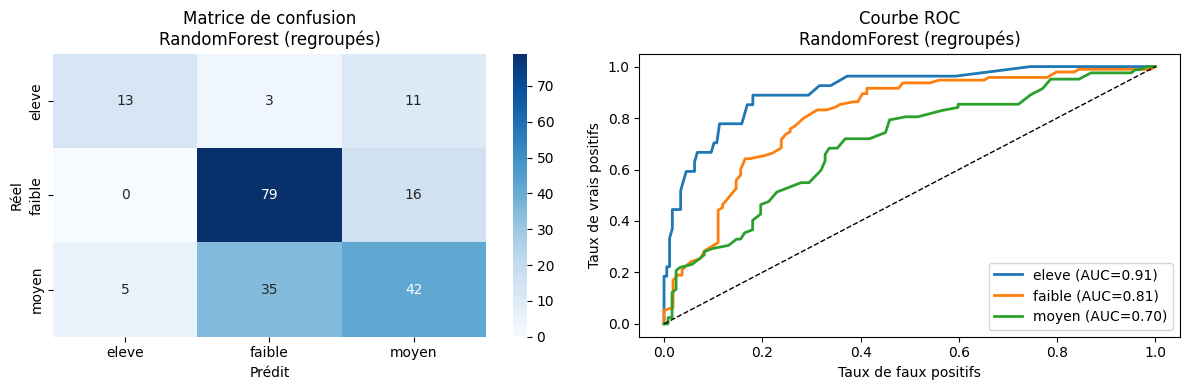

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_confusion_and_roc(y_true, y_pred, y_proba, classes, model_name="Modèle"):
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    y_bin = label_binarize(y_true, classes=classes)
    n_classes = len(classes)

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axs[0])
    axs[0].set_title(f"Matrice de confusion\n{model_name}")
    axs[0].set_xlabel("Prédit")
    axs[0].set_ylabel("Réel")
    axs[0].set_xticklabels(classes)
    axs[0].set_yticklabels(classes)

    # ROC curve(s)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        axs[1].plot(fpr, tpr, lw=2, label=f"{classes[i]} (AUC={roc_auc:.2f})")
    axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[1].set_xlabel('Taux de faux positifs')
    axs[1].set_ylabel('Taux de vrais positifs')
    axs[1].set_title(f"Courbe ROC\n{model_name}")
    axs[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# ——— Exemple pour “tous les labels” ———
plot_confusion_and_roc(
    y1_test, y1_pred, y1_proba, classes=rf1.classes_, model_name="RandomForest (tous labels)"
)

# ——— Exemple pour “labels regroupés” ———
plot_confusion_and_roc(
    y2_test, y2_pred, y2_proba, classes=rf2.classes_, model_name="RandomForest (regroupés)"
)


### Analyse & actions pour modele plus performant RandomForest avec regouppement de labels
* Pourquoi le regroupement aide ?
On simplifie la tâche d’apprentissage : le modèle n’a plus à deviner entre 6 nuances mais 3 catégories plus robustes statistiquement. Cela réduit l’effet du déséquilibre extrême des classes rares.

* Pourquoi la classe “faible” est toujours ignorée ?
Même après regroupement, elle reste extrêmement minoritaire. Sans techniques d’équilibrage (oversampling, SMOTE…) ou collecte de nouvelles données, aucun algorithme standard ne peut bien l’identifier.

* Que montre la log loss ?
Elle traduit la confiance du modèle dans ses prédictions. Sa baisse montre que le regroupement de classes permet au modèle d’être plus sûr de ses choix.

* Limite métier
L’outil sera fiable pour distinguer un vin ‘moyen’ ou ‘élevé’, mais il ne faut pas se reposer sur lui pour détecter les vins de très faible qualité.

### Actions
* A partir du dataframe df_group, optimiser avec
Oversampling, ne doit être appliqué que sur le set d’entraînement, jamais sur le test.  
class_weight="balanced" dans RandomForest améliore souvent le recall sur les classes minoritaires.  
GridSearchCV permet de trouver automatiquement les meilleurs hyperparamètres, en prenant en compte le rééquilibrage.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from imblearn.over_sampling import RandomOverSampler

# --- Préparation des données ---
df_group_o = df_scaled.copy()  # On utilise la dataframe déjà préparée et scale

def regroupe_qualite(q):
    if q <= 5:
        return "faible"
    elif q <= 6:
        return "moyen"
    else:
        return "eleve"

df_group_o['quality_group'] = df_group_o['quality'].apply(regroupe_qualite)
df_group_opt = df_group_o.drop(['quality'], axis=1)

X = df_group_opt.drop(['quality_group'], axis=1)
y = df_group_opt['quality_group']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- 1. Oversampling ---
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

print("Répartition des classes APRES oversampling :", y_res.value_counts())

# --- 2. RandomForest avec class_weight='balanced' & GridSearch ---
param_grid = {
    'n_estimators': [100, 200],          # nombre d'arbres
    'max_depth': [None, 5, 10, 20],      # profondeur max
    'min_samples_split': [2, 5, 10],     # min samples pour splitter un noeud
    'class_weight': ['balanced']         # pondération auto
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_res, y_res)

print(f'-'*100)
print("Meilleurs paramètres :", grid.best_params_)
print(f'-'*100)

# --- METRICS sur TRAIN (après oversampling) ---
y_train_pred = grid.predict(X_res)
y_train_proba = grid.predict_proba(X_res)

print("=== [TRAIN] Random Forest Optimisée (oversampling + balanced) ===")
print("Accuracy :", accuracy_score(y_res, y_train_pred))
print("Classification Report :\n", classification_report(y_res, y_train_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_res, y_train_pred))
print("Log Loss (cross-entropy) :", log_loss(y_res, y_train_proba, labels=grid.best_estimator_.classes_))

print("\n" + "="*100 + "\n")

# --- METRICS sur TEST ---
y_test_pred = grid.predict(X_test)
y_test_proba = grid.predict_proba(X_test)

print("=== [TEST] Random Forest Optimisée (oversampling + balanced) ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Classification Report :\n", classification_report(y_test, y_test_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_test_pred))
print("Log Loss (cross-entropy) :", log_loss(y_test, y_test_proba, labels=grid.best_estimator_.classes_))


Répartition des classes APRES oversampling : quality_group
moyen     377
faible    377
eleve     377
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Meilleurs paramètres : {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
----------------------------------------------------------------------------------------------------
=== [TRAIN] Random Forest Optimisée (oversampling + balanced) ===
Accuracy : 0.9991158267020336
Classification Report :
               precision    recall  f1-score   support

       eleve       1.00      1.00      1.00       377
      faible       1.00      1.00      1.00       377
       moyen       1.00      1.00      1.00       377

    accuracy                           1.00      1131
   macro avg       1.00      1.00      1.00      1131
weighted avg       1.00      1.00      1.00      1131

Matrice de confusion :
 [[377   0   0]
 [  0 377   0]

# Visualisationion des résultats

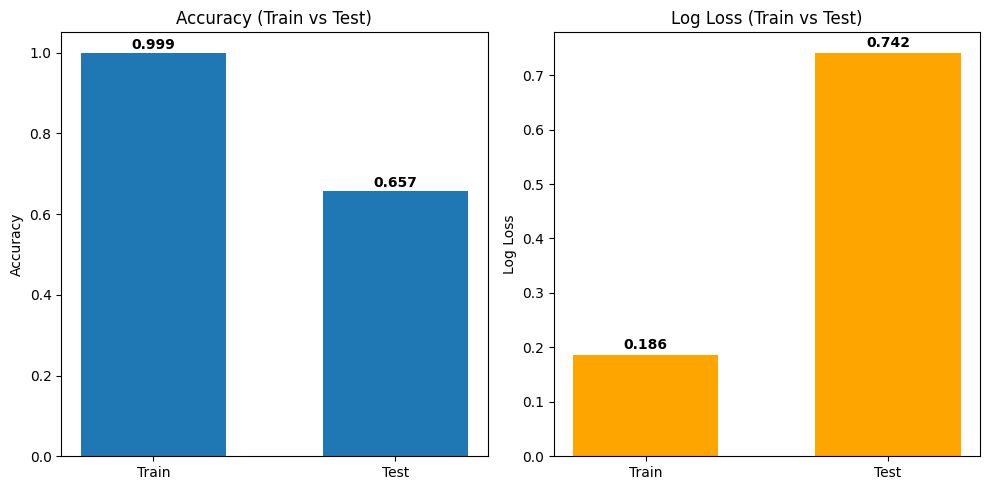

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les valeurs calculées ci-dessus
accuracy_train = accuracy_score(y_res, y_train_pred)
logloss_train = log_loss(y_res, y_train_proba, labels=grid.best_estimator_.classes_)

accuracy_test = accuracy_score(y_test, y_test_pred)
logloss_test = log_loss(y_test, y_test_proba, labels=grid.best_estimator_.classes_)

# Données pour les graphes
labels = ['Train', 'Test']
accuracy_values = [accuracy_train, accuracy_test]
logloss_values = [logloss_train, logloss_test]

x = np.arange(len(labels))  # positions

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 ligne, 2 colonnes

# Graphique 1 : Accuracy
axes[0].bar(x, accuracy_values, width=0.6)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylim(0, 1.05)
axes[0].set_title('Accuracy (Train vs Test)')
axes[0].set_ylabel('Accuracy')
for i, v in enumerate(accuracy_values):
    axes[0].text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# Graphique 2 : Log Loss
axes[1].bar(x, logloss_values, width=0.6, color='orange')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].set_title('Log Loss (Train vs Test)')
axes[1].set_ylabel('Log Loss')
for i, v in enumerate(logloss_values):
    axes[1].text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


#### Analyse et actions

* Suaprentisage detecté sur train
* Le label quality "faible" dans le test non identifié reste a 0

#### Action
Utiliser SMOTE pour équilibrer les classes dans le train dans une pipeline 
méthode de suréchantillonnage qui génère des exemples synthétiques de la classe minoritaire

In [20]:
# 1. Import et pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss

# --- Préparation des données ---
df_group_p = df_scaled.copy()  # On utilise la dataframe déjà préparée et scale

def regroupe_qualite(q):
    if q <= 5:
        return "faible"
    elif q <= 6:
        return "moyen"
    else:
        return "eleve"

df_group_p['quality_group'] = df_group_p['quality'].apply(regroupe_qualite)
df_group_po = df_group_p.drop(['quality'], axis=1)

X = df_group_po.drop(['quality_group'], axis=1)
y = df_group_po['quality_group']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(
    random_state=42,
    sampling_strategy={'faible': y_train.value_counts().max()}
)

pipe = Pipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier(
        random_state=42,
        oob_score=True,
        # class_weight='balanced' pour gérer les déséquilibres
        class_weight='balanced'
    ))
])

#  2. Distribution hyperparamètres
param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': randint(2, 11),
    'rf__min_samples_leaf': randint(1, 5),
    #'rf__max_features': uniform(0.2, 0.8),
    'rf__max_features': ['sqrt', 'log2'],
    #'rf__criterion': ['gini'],
    #'rf__criterion': ['entropy'],
    'rf__bootstrap': [True]
}

#  3. Recherche aléatoire optimisant la log-loss
rand_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=50,               # n try raisonnable
    scoring='neg_log_loss',  # optimisation de la log-loss :contentReference[oaicite:17]{index=17}
    cv=2,                    # 3 folds pour l'exploration rapide :contentReference[oaicite:18]{index=18}
    n_jobs=-1,               # tous les cœurs CPU :contentReference[oaicite:19]{index=19}
    random_state=42,
    verbose=2,
    refit=True
)

rand_search.fit(X_train, y_train)

#  4. Affichage des meilleurs résultats
print("Meilleurs paramètres :", rand_search.best_params_)
print("Best CV log-loss (négatif) :", rand_search.best_score_)

#  5. Évaluation finale sur le jeu de test
best_model = rand_search.best_estimator_
y_test_proba = best_model.predict_proba(X_test)
test_logloss = log_loss(y_test, y_test_proba)
print("Log Loss sur TEST :", test_logloss)


Fitting 2 folds for each of 50 candidates, totalling 100 fits
Meilleurs paramètres : {'rf__bootstrap': True, 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 4, 'rf__n_estimators': 463}
Best CV log-loss (négatif) : -0.7844531041830055
Log Loss sur TEST : 0.7443131002105382


#### Visualisation des resultats

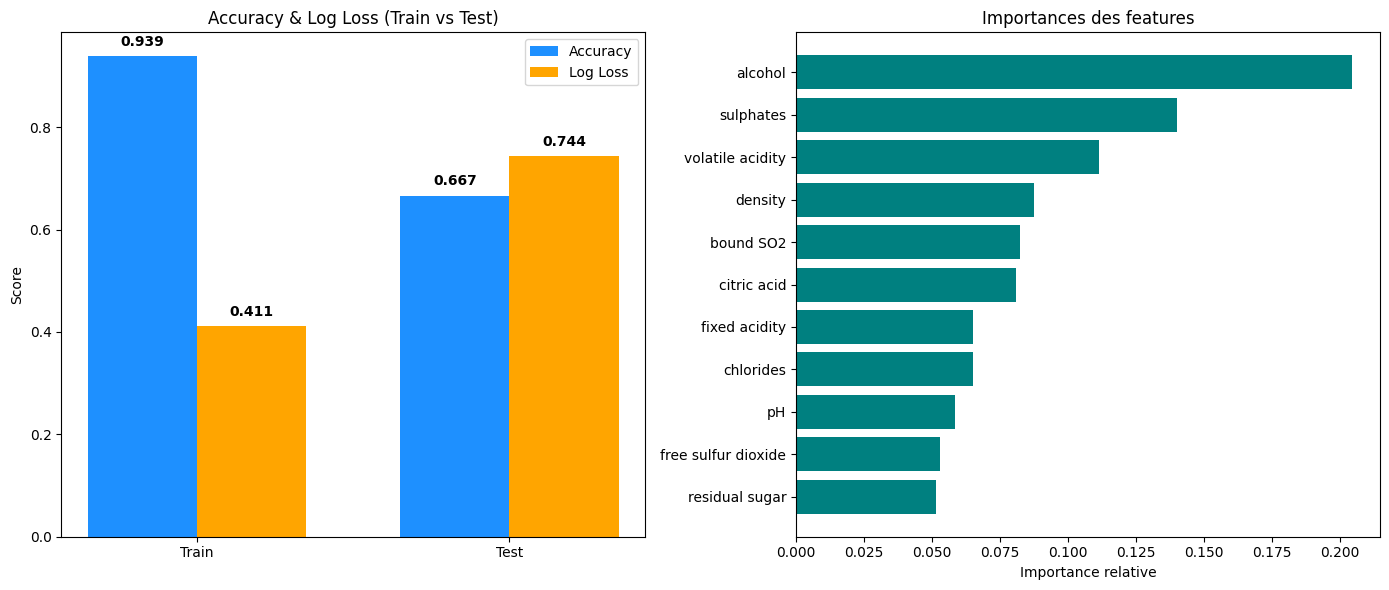

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- (Re)calcul des métriques sur best_model ---
from sklearn.metrics import accuracy_score, log_loss

# Train
y_train_pred  = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
logloss_train  = log_loss(y_train, y_train_proba, labels=best_model.classes_)

# Test
y_test_pred   = best_model.predict(X_test)
y_test_proba  = best_model.predict_proba(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
logloss_test  = log_loss(y_test, y_test_proba, labels=best_model.classes_)

# --- Préparer les données pour le barplot ---
labels         = ['Train', 'Test']
accuracy_vals  = [accuracy_train, accuracy_test]
logloss_vals   = [logloss_train,  logloss_test]

# --- Importances des features ---
importances       = best_model.named_steps['rf'].feature_importances_
feature_names     = X_train.columns
sorted_idx        = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features    = feature_names[sorted_idx]

# --- Affichage côte à côte ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1) Accuracy & Log Loss
x     = np.arange(len(labels))
width = 0.35

axes[0].bar(x - width/2, accuracy_vals, width, label='Accuracy', color='dodgerblue')
axes[0].bar(x + width/2, logloss_vals,  width, label='Log Loss', color='orange')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_title('Accuracy & Log Loss (Train vs Test)')
axes[0].set_ylabel('Score')
axes[0].legend()

for i, v in enumerate(accuracy_vals):
    axes[0].text(i - width/2, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
for i, v in enumerate(logloss_vals):
    axes[0].text(i + width/2, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')

# 2) Importances des features
axes[1].barh(np.arange(len(sorted_features)), sorted_importances, color='teal')
axes[1].set_yticks(np.arange(len(sorted_features)))
axes[1].set_yticklabels(sorted_features)
axes[1].invert_yaxis()
axes[1].set_title("Importances des features")
axes[1].set_xlabel("Importance relative")

plt.tight_layout()
plt.show()


In [22]:
# 6. Sauvegarde du modèle final avec joblib
import os
import joblib

# 1. Créer le dossier de sauvegarde s'il n'existe pas
save_dir = "../Models"
os.makedirs(save_dir, exist_ok=True)

# 2. Nommer le fichier
model_filename = os.path.join(save_dir, "ML_best_model_rf_optimized_v1.joblib")

# 3. Enregistrer la pipeline optimisée (SMOTE + RF)
#    best_model est issu de rand_search.best_estimator_
print(f"Enregistrement du modèle dans : {model_filename}")
joblib.dump(best_model, model_filename, compress=3)
print("Modèle enregistré avec succès.")


Enregistrement du modèle dans : ../Models\ML_best_model_rf_optimized_v1.joblib
Modèle enregistré avec succès.


##### Utilisationion du modèle sauvegardé pour faire des prédictions sur de nouvelles données


In [23]:
import pandas as pd
import numpy as np
import joblib

# 1. Charger la pipeline enregistrée
model_filename = "../Models/ML_best_model_rf_optimized_v1.joblib"
loaded_model = joblib.load(model_filename)

# 2. Prédire sur X_test
y_pred  = loaded_model.predict(X_test)
y_proba = loaded_model.predict_proba(X_test)

# 3. Construire un DataFrame pour l’affichage
#    - Colonne 'prediction' : classe prédite
#    - Colonnes pour chaque probabilité de classe
df_pred   = pd.DataFrame({'prediction': y_pred})
proba_df  = pd.DataFrame(
    y_proba,
    columns=[f'proba_{c}' for c in loaded_model.classes_]
)
results_df = pd.concat([df_pred, proba_df], axis=1)

# 4. Arrondir les probabilités à 3 décimales pour la lisibilité
for col in proba_df.columns:
    results_df[col] = results_df[col].round(3)

# 5. Afficher un échantillon
print("=== Exemples de prédictions et probabilités (5 premières lignes) ===")
print(results_df.head())


=== Exemples de prédictions et probabilités (5 premières lignes) ===
  prediction  proba_eleve  proba_faible  proba_moyen
0     faible        0.027         0.651        0.322
1      eleve        0.428         0.163        0.409
2     faible        0.076         0.477        0.447
3     faible        0.003         0.743        0.254
4      moyen        0.299         0.303        0.398
